# About this notebook


In this notebook you evaluate two multimodal models against each other:

* BLIP
* LLaVA


# Imports

In [4]:
from PIL import Image
import requests
import torch
from transformers import pipeline
from transformers import Blip2Model, Blip2Processor, Blip2ForConditionalGeneration
from transformers import BitsAndBytesConfig
from transformers import AutoProcessor, LlavaForConditionalGeneration

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Image to test the models

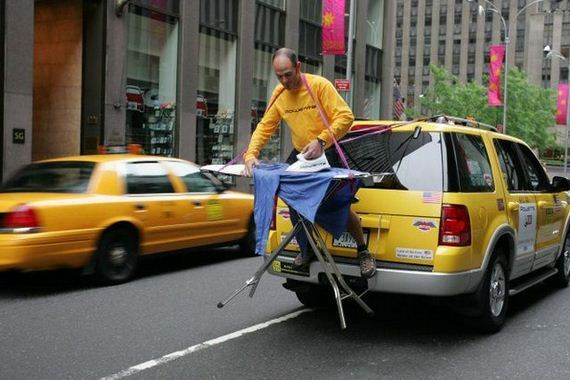

In [6]:

url = "https://www.barnorama.com/wp-content/uploads/2016/12/03-Confusing-Pictures.jpg"
image = Image.open(requests.get(url, stream=True).raw)
display(image)


# First model to try out - BLIP

In [7]:

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)


model_id = "Salesforce/blip2-opt-2.7b"

processor = AutoProcessor.from_pretrained(model_id)
model = Blip2ForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config, device_map="auto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## Use pipeline to run the model

In [8]:
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## Run inference on the model

In [12]:
prompt = "Question: What is unusual about this image? Answer:"
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 300, "do_sample" : True})

In [13]:
outputs[0]["generated_text"]

" I'm wearing clothes, I'm driving a car, and I'm sitting on the back of a taxi. This is a normal image. To get to this point – to drive in the rear of a yellow cab in nyc or to get into the back of one and do the laundry yourself – is difficult in itself. And even harder to do, is to make all the various elements look completely normal together – to make the cab in nyc look odd, to make the laundry appear normal, and to make the back of the taxi and to make it look like I'm sitting still. This requires skills that the average person doesn't have. Not the driver – the person in the image.\n"

## Use temperature as additional setting

In [10]:
prompt = "Question: What is unusual about this image? Answer:"
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 300, "do_sample" : True, "temperature" : 0.8})

In [11]:
print(outputs[0]["generated_text"])

 a car with a fold-down washing machine in the back seat, a man in yellow shirt



# Second model to try out - LLaVA

In [14]:

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)


model_id = "llava-hf/llava-1.5-7b-hf"

processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config, device_map="auto")

preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

## Use pipeline to run the model

In [15]:
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Run inference on the model

In [16]:
prompt = "USER: <image>\nWhat is unusual about this image?\nASSISTANT:"
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 300})

In [17]:
print(outputs[0]["generated_text"])

USER:  
What is unusual about this image?
ASSISTANT: The unusual aspect of this image is that a man is standing on the back of a moving yellow truck, holding a clothes iron. This is not a common sight, as people typically do not stand on the back of moving vehicles, especially when carrying heavy objects like an iron. The man's actions pose a risk to his safety and the stability of the truck.


## Use temperature as additional setting

In [18]:
prompt = "USER: <image>\nWhat is unusual about this image?\nASSISTANT:"
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 300, "do_sample" : True, "temperature" : 0.8})


In [19]:
print(outputs[0]["generated_text"])

USER:  
What is unusual about this image?
ASSISTANT: The unusual aspect of this image is the man who is wearing a yellow shirt and standing on the back of a yellow vehicle. He is holding a white shirt or pressing on the roof of the car, which is an unconventional and potentially dangerous act. This is not something you typically see in everyday life, making it a remarkable and unique scene.
